In [1]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('air_pollution.csv', parse_dates=['date'])

In [3]:
data.set_index('date',inplace=True)

In [4]:
data.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [5]:
data.tail()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.0,0.0,170.250000
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.0,0.0,238.666667
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.0,0.0,197.375000
2014-12-30,46.083333,-13.916667,1.875000,1019.125000,9.778333,0.0,0.0,159.000000
2014-12-31,10.041667,-21.791667,-1.916667,1032.125000,167.458333,0.0,0.0,46.083333


In [6]:
date=data[['pollution_today']]

In [7]:
date.head()

,pollution_today
date,
2010-01-02,145.958333
2010-01-03,78.833333
2010-01-04,31.333333
2010-01-05,42.458333
2010-01-06,56.416667


<AxesSubplot:xlabel='date'>

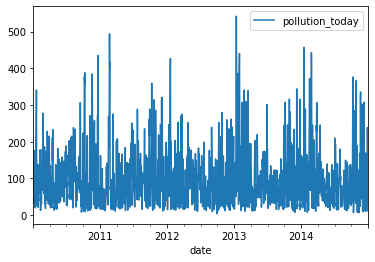

In [8]:
date.plot()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

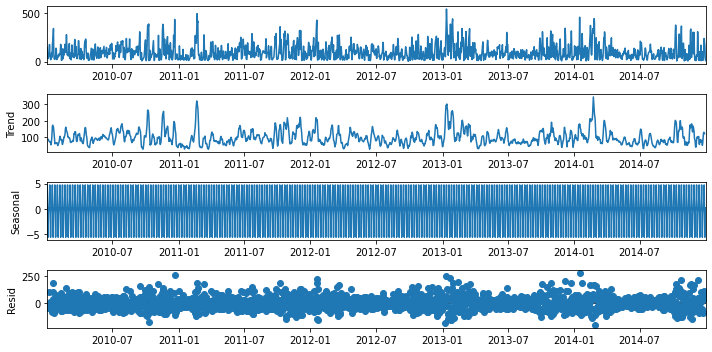

In [10]:
decompose= seasonal_decompose(date,model='additive')
rcParams['figure.figsize']=10,5
decompose.plot();

# plotting PACF and ACF

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

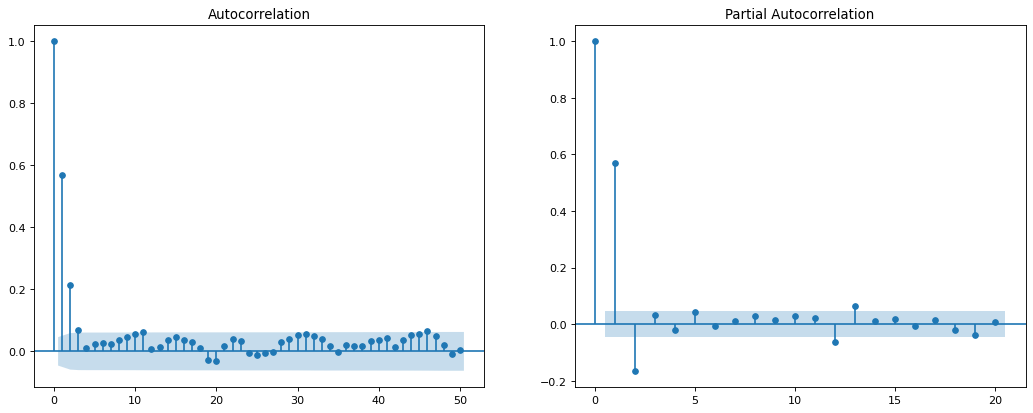

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(data["pollution_today"].tolist(), ax=ax1, lags=50);
plot_pacf(data["pollution_today"].tolist(), ax=ax2, lags=20);

In [13]:
from statsmodels.tsa.statespace.tools import diff

In [14]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

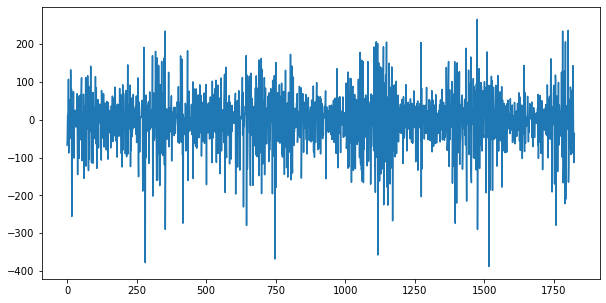

In [15]:
# difference the dataset
diff1 = difference(date['pollution_today'], interval=1)
plt.plot(diff1)

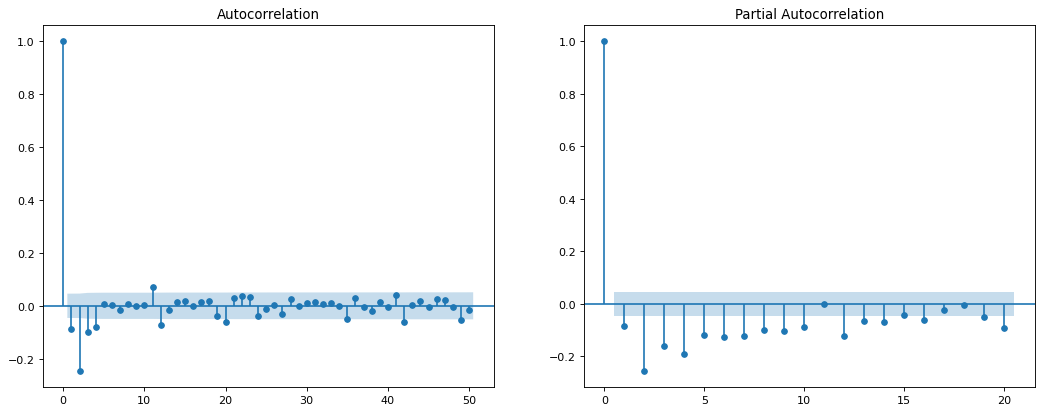

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(diff1, ax=ax1, lags=50);
plot_pacf(diff1, ax=ax2, lags=20);

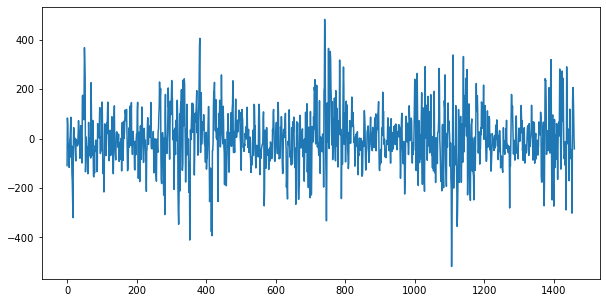

In [17]:
# difference the dataset
diff2 = difference(date['pollution_today'], interval=365)
plt.plot(diff2)

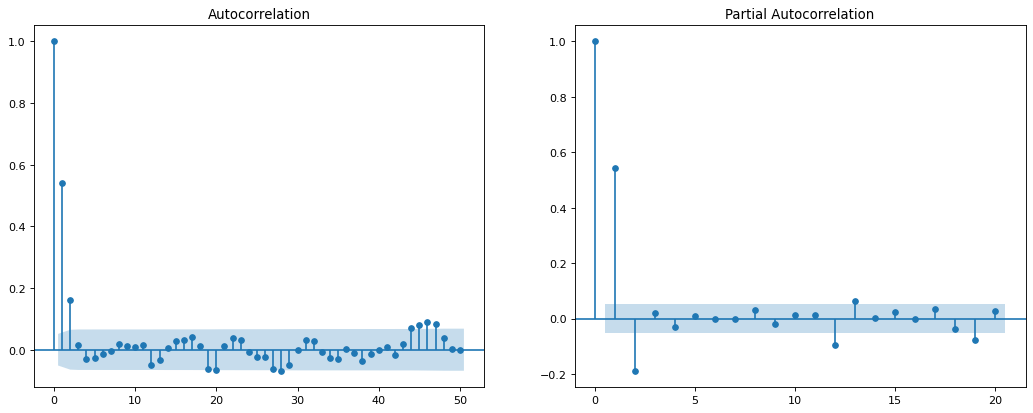

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(diff2, ax=ax1, lags=50);
plot_pacf(diff2, ax=ax2, lags=20);

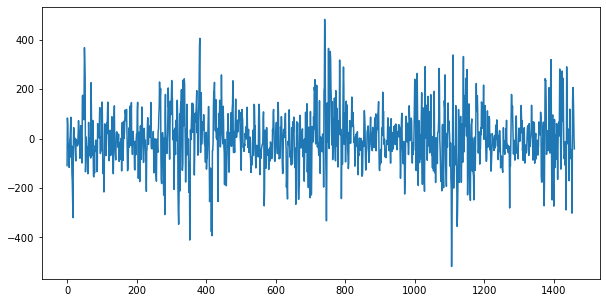

In [20]:
# difference the dataset
diff3 = difference(date['pollution_today'], interval=365)
plt.plot(diff3)

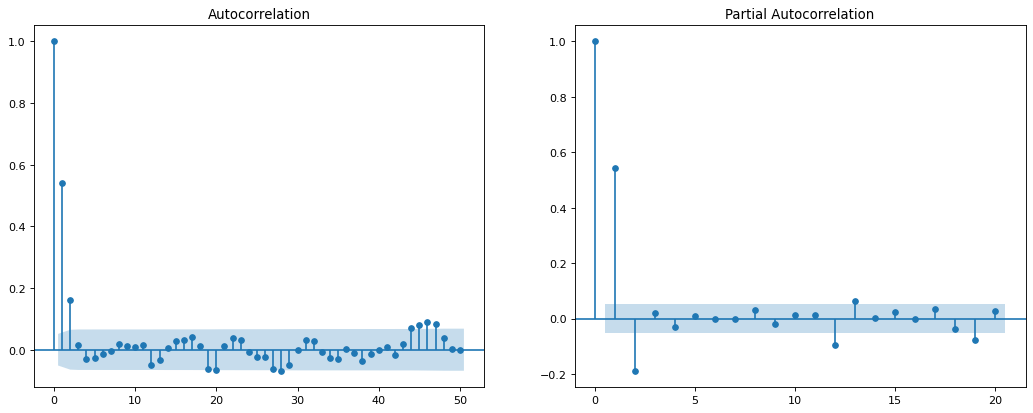

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(diff3, ax=ax1, lags=50);
plot_pacf(diff3, ax=ax2, lags=20);

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [23]:
date.shape

(1825, 1)

In [27]:
train, test = date.iloc[:1460, 0], date.iloc[1460:, 0]

In [28]:
model=ExponentialSmoothing(train,seasonal='additive',seasonal_periods=365).fit()

C:\shubhangi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\shubhangi\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
pred=model.predict((start=test.index[0], end=test.index[-1])

SyntaxError: invalid syntax (<ipython-input-37-58311bcb9507>, line 1)

In [34]:
test.shape

(365,)

In [35]:
pred.shape

(1095,)

In [36]:
pred

2011-01-02     63.520286
2011-01-03     25.988186
2011-01-04     57.086944
2011-01-05     86.675837
2011-01-06     66.593051
                 ...    
2013-12-27    121.685999
2013-12-28     52.440911
2013-12-29    -44.838441
2013-12-30      4.672143
2013-12-31     41.785781
Freq: D, Length: 1095, dtype: float64